# Paso 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [9]:
# Importación de librerías necesarias
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import SelectKBest, chi2  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, confusion_matrix 

In [ ]:
# Importación de librerías necesarias
# Manipulación y análisis de datos
# Visualización de datos
# Visualización de datos, basado en matplotlib

# Importación de herramientas de scikit-learn
# División de los datos en conjuntos de entrenamiento y prueba
# Selección de características
# Modelo de regresión lineal
# Evaluación del modelo

In [12]:
# Carga del dataset
file_path = 'C:/Users/fabia/OneDrive/Escritorio/Tarea 5/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
# se carga el dataset que esta en la dirección""

In [13]:
# Visualización de las primeras filas del DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#Este código carga los datos desde la ubicación especificada y muestra las primeras cinco filas del DataFrame, lo que ayuda a verificar que los datos se han cargado correctamente y a entender la estructura y el contenido inicial de los datos.

In [14]:
# Información general del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#df.info(): Muestra la información general del DataFrame, incluyendo el número de entradas, nombres de columnas, tipos de datos y cantidad de valores no nulos.

In [15]:
# Estadísticas descriptivas
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
#df.describe(): Proporciona estadísticas descriptivas para las columnas numéricas.

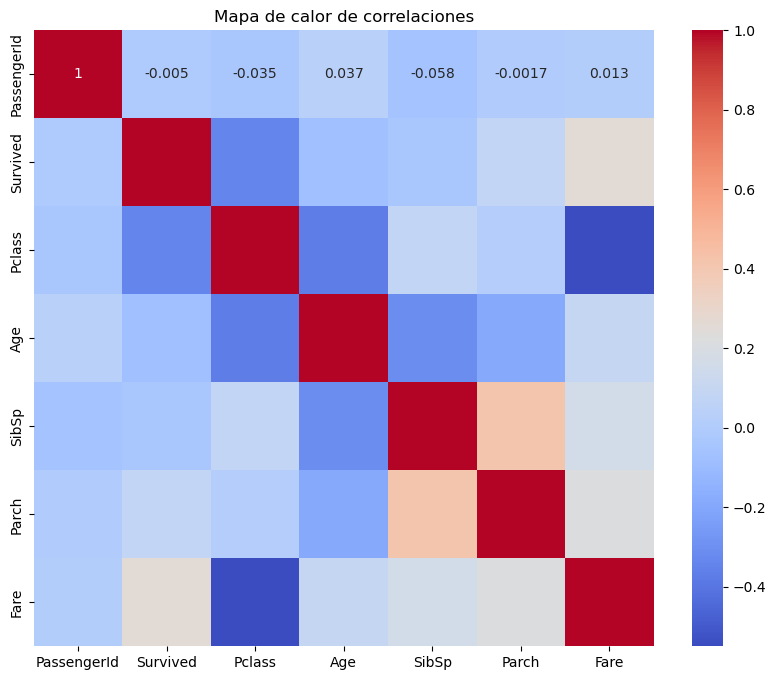

In [16]:
# Filtramos el DataFrame para incluir solo columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Ahora calculamos el mapa de calor de correlaciones solo con estas columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [ ]:
#Survived: Pclass: Tiene una ligera correlación negativa con Survived (~-0.35). Esto sugiere que a medida que la clase del pasajero aumenta (de 1 a 3), la probabilidad de supervivencia disminuye.
# Age: Tiene una ligera correlación negativa muy débil con Survived.
# SibSp y Parch: Tienen una correlación muy débil con Survived.
# Fare: Tiene una ligera correlación positiva con Survived (~0.26), lo que sugiere que los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de supervivencia.
# Pclass:Fare: Tiene una correlación negativa fuerte (~-0.55) con Pclass. Esto tiene sentido ya que los pasajeros de primera clase (Pclass = 1) pagaron tarifas más altas.
# Age: No tiene fuertes correlaciones con ninguna otra variable, lo que sugiere que la edad no está fuertemente relacionada con las otras características numéricas del dataset.
# SibSp y Parch:SibSp y Parch tienen una correlación positiva moderada (~0.41). Esto es lógico, ya que es probable que los pasajeros con más hermanos/hermanas tengan también más padres/hijos a bordo.
#Fare:Como he mencionado antes, tiene una fuerte correlación negativa con Pclass y una ligera correlación positiva con Survived.
#Este mapa de calor ayuda a identificar las relaciones entre diferentes características del dataset. Aunque ninguna correlación es extremadamente fuerte (cerca de 1 o -1), es importante considerar estas relaciones al preprocesar los datos y construir modelos predictivos. sugieren que las clases más altas y tarifas más altas se asociaron con mayores tasas de supervivencia.

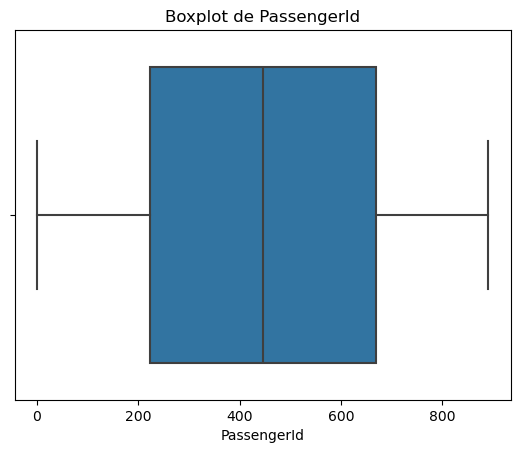

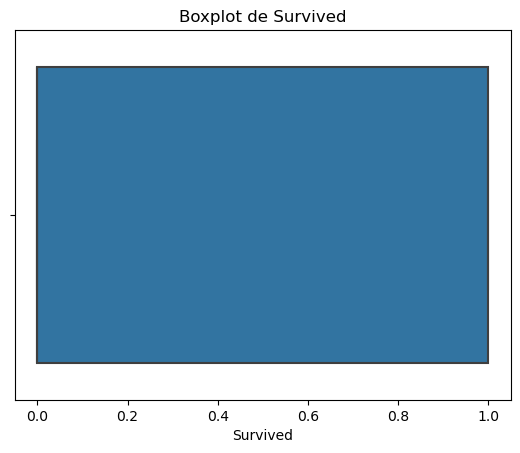

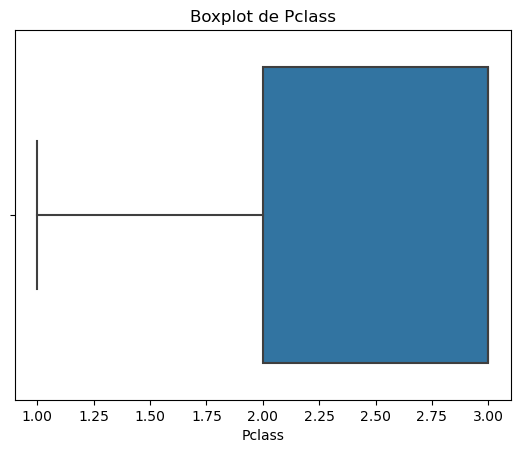

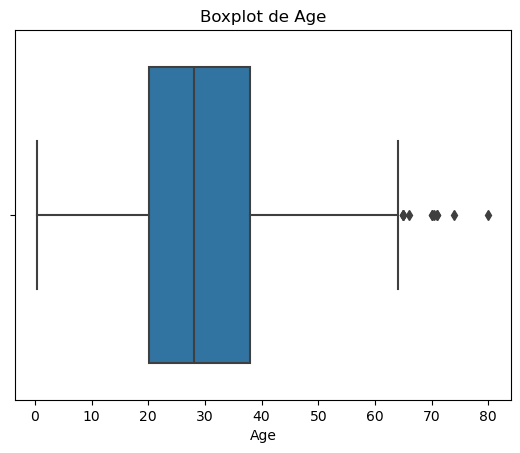

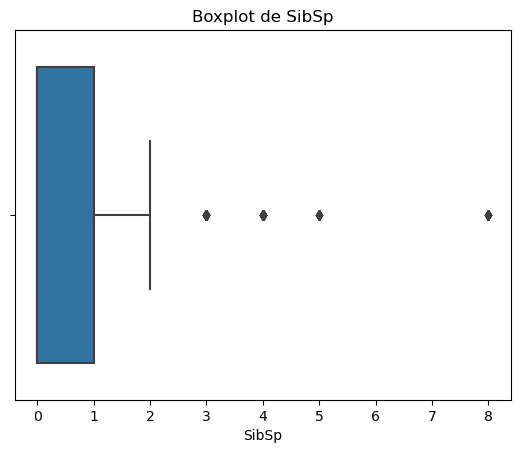

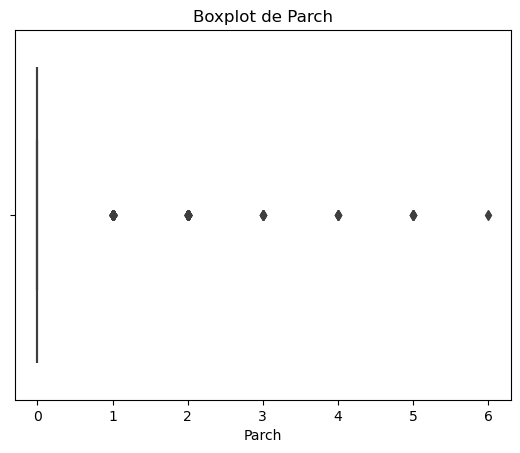

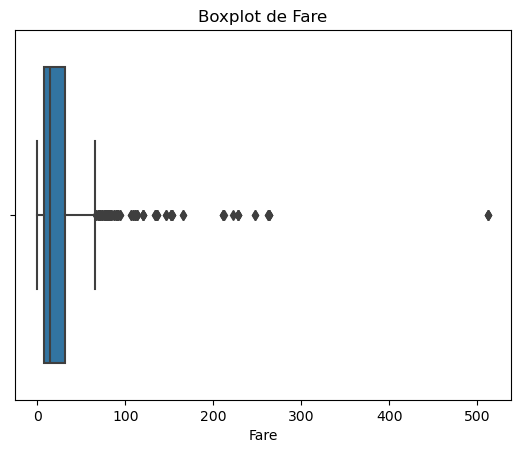

In [17]:
# Boxplots para identificar valores atípicos
for column in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [ ]:
#Interpretación de Boxplots
#Valores Centrales: La línea dentro de la caja representa la mediana de los datos.
#Los bordes de la caja representan el primer (Q1) y tercer (Q3) cuartil.
#Valores Atípicos:Los puntos fuera de los "bigotes" del boxplot se consideran valores atípicos (outliers).
#Los bigotes se extienden hasta 1.5 veces el rango intercuartil (IQR, que es Q3 - Q1) por encima de Q3 y por debajo de Q1.
# En los boxplots generados, se puede identificar qué columnas tienen valores atípicos y decidir cómo tratarlos en el preprocesamiento de datos. 

# Paso 2: Preprocesamiento de Datos

In [18]:
# Rellenando valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
#Relleno de valores faltantes en Age:

#df['Age'].fillna(df['Age'].median(), inplace=True):
#Utiliza la mediana de la columna Age para rellenar los valores faltantes (NaN). La mediana es una medida robusta de tendencia central que no se ve afectada por valores atípicos.
#inplace=True asegura que los cambios se realicen directamente en el DataFrame original sin necesidad de asignar el resultado a una nueva variable.
#Relleno de valores faltantes en Embarked:

#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True):
#Utiliza la moda (el valor más frecuente) de la columna Embarked para rellenar los valores faltantes. La moda es adecuada para variables categóricas.
#mode()[0] accede al primer valor de la moda (en caso de haber múltiples valores con la misma frecuencia, toma el primero).
#inplace=True realiza los cambios directamente en el DataFrame original.
#Justificación 
#Mediana para Age:
#La edad de los pasajeros es una variable continua. La mediana es robusta a valores atípicos y proporciona una estimación central razonable cuando faltan datos.
#Moda para Embarked:El puerto de embarque es una variable categórica. Usar la moda asegura que los valores faltantes se llenen con el valor más común, manteniendo la distribución original de los datos.

In [19]:
# Eliminación de la columna 'Cabin'
df.drop('Cabin', axis=1, inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

print(df.head())  # Verificar los cambios

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500       False      True       False       False   
1          PC 17599  71.2833        True     False        True       False   
2  STON/O2. 3101282   7.9250        True     False       False       False   
3            1

In [ ]:
#Eliminación de la columna Cabin:

#df.drop('Cabin', axis=1, inplace=True):
#Elimina la columna Cabin del DataFrame debido a la gran cantidad de valores faltantes.
#axis=1 indica que estamos eliminando una columna.
#inplace=True aplica el cambio directamente en el DataFrame original.
#Codificación de variables categóricas: df = pd.get_dummies(df, columns=['Sex', 'Embarked']):
#Utiliza pd.get_dummies para convertir las variables categóricas Sex y Embarked en variables dummy (o indicadores), creando una nueva columna para cada categoría con valores 0 o 1.
#Esto es necesario porque los modelos de machine learning generalmente requieren variables numéricas.
#Verificación de los cambios: print(df.head()):
#Muestra las primeras filas del DataFrame para verificar que las transformaciones se han aplicado correctamente.
#Resultado
#Después de ejecutar este código, la columna Cabin ha sido eliminada y las columnas Sex y Embarked han sido convertidas en variables dummy:
#Las columnas Sex se han convertido en Sex_female y Sex_male.
#Las columnas Embarked se han convertido en Embarked_C, Embarked_Q y Embarked_S.
#Esto asegura que todas las características en el DataFrame son numéricas y adecuadas para el modelado.

# Paso 3: Selección de Características

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)  # Presupone eliminación de variables no numéricas o identificativas
y = df['Survived']
selector = SelectKBest(chi2, k='all')
X_new = selector.fit_transform(X, y)

# Imprimir los scores de las características
print("Scores de las características seleccionadas:", selector.scores_)

Scores de las características seleccionadas: [3.31293407e+00 3.08736994e+01 2.16491630e+01 2.58186538e+00
 1.00974991e+01 4.51831909e+03 1.70348127e+02 9.27024470e+01
 2.04644013e+01 1.08467891e-02 5.48920482e+00]


In [ ]:
#X y y:

#X = df.drop(['Survived', 'Name', 'Ticket'], axis=1):
#X contiene todas las características excepto las no numéricas (Name y Ticket) y la variable objetivo (Survived).
#y = df['Survived']: y contiene la variable objetivo que queremos predecir.
#Selección de características:

#selector = SelectKBest(chi2, k='all'):
#Utiliza SelectKBest para seleccionar todas las características basadas en la prueba chi-cuadrado.
#X_new = selector.fit_transform(X, y):
#Ajusta el selector a los datos y transforma X en el subconjunto seleccionado.
#print("Scores de las características seleccionadas:", selector.scores_):
#Imprime los scores de las características seleccionadas, lo que te permitirá ver cuáles son las más relevantes para el modelo.
#Interpretación
#Los scores representan la importancia de cada característica en relación con la variable objetivo (Survived).
#Un score más alto indica que la característica es más relevante para predecir la variable objetivo.

# Paso 4: División del Dataset en Train y Test



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [ ]:
#División del dataset:

#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42):
#Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%).
#test_size=0.3 especifica el tamaño del conjunto de prueba.
#random_state=42 asegura que la división sea reproducible.

#Imprimir tamaños:
#print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}') y print(f'Tamaño del conjunto de prueba: {X_test.shape}'):
#Muestra los tamaños de los conjuntos de entrenamiento y prueba, lo que ayuda a verificar que la división se ha realizado correctamente.

# Paso 5: Entrenamiento del Modelo

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Aumenta max_iter si es necesario
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Entrenamiento del modelo:
#model = LinearRegression(): Crea una instancia del modelo de regresión lineal.
#model.fit(X_train, y_train): Entrena el modelo con los datos de entrenamiento.

#Predicción y evaluación:
#y_pred = model.predict(X_test): Realiza predicciones en el conjunto de prueba.
#mean_squared_error(y_test, y_pred): Calcula el error cuadrático medio (MSE).
#r2_score(y_test, y_pred): Calcula el coeficiente de determinación (R^2).
#print("Mean Squared Error:", mse) y print("R^2 Score:", r2): imprime las métricas de evaluación del modelo.

# Paso 6: Evaluación del Modelo

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

[[135  22]
 [ 30  81]]


In [ ]:
#Interpretación de los Resultados
#Precisión (Precision):

#Clase 0: 0.82
#Clase 1: 0.79
#La precisión es la proporción de verdaderos positivos sobre el total de predicciones positivas. Indica la exactitud de las predicciones positivas del modelo.
#Una precisión de 0.82 para la clase 0 significa que el 82% de las predicciones de no sobrevivencia fueron correctas.
#Una precisión de 0.79 para la clase 1 significa que el 79% de las predicciones de sobrevivencia fueron correctas.
#Recall (Recall):

#Clase 0: 0.86
#Clase 1: 0.73
#El recall es la proporción de verdaderos positivos sobre el total de verdaderos positivos más falsos negativos. Indica la capacidad del modelo para encontrar todos los casos positivos.
#Un recall de 0.86 para la clase 0 significa que el modelo identificó correctamente el 86% de los casos de no sobrevivencia.
#Un recall de 0.73 para la clase 1 significa que el modelo identificó correctamente el 73% de los casos de sobrevivencia.
#F1-Score:

#Clase 0: 0.84
#Clase 1: 0.76
#El F1-score es la media armónica de la precisión y el recall. Es útil para un balance entre precisión y recall.
#Un F1-score de 0.84 para la clase 0 y de 0.76 para la clase 1 indica un buen equilibrio entre precisión y recall.
#Matriz de Confusión:

#Verdaderos Negativos (Clase 0 predicha correctamente): 135
#Falsos Positivos (Clase 1 predicha incorrectamente como Clase 0): 22
#Falsos Negativos (Clase 0 predicha incorrectamente como Clase 1): 30
#Verdaderos Positivos (Clase 1 predicha correctamente): 81


# Paso 7: Visualización de Resultados

In [ ]:
import matplotlib.pyplot as plt

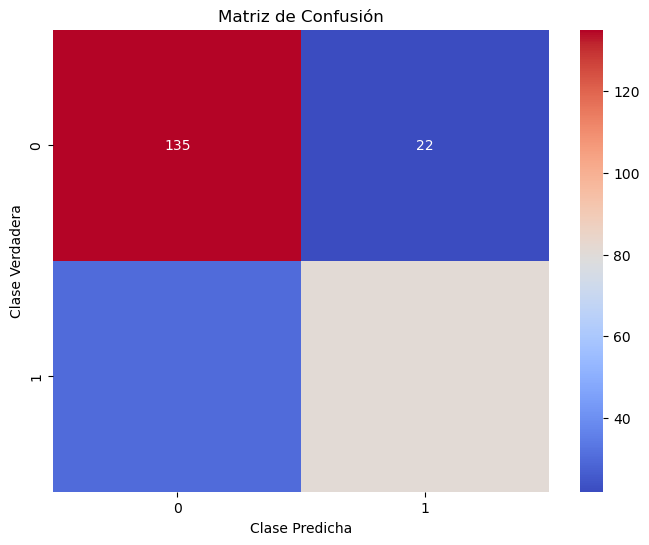

In [24]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

In [ ]:
#Interpretación de la Matriz de Confusión
#Verdaderos Negativos (TN): 135
#Falsos Positivos (FP): 22
#Falsos Negativos (FN): 30
#Verdaderos Positivos (TP): 81
#Métricas del Modelo
#Precisión (Precision):
#Clase 0: 0.82
#Clase 1: 0.79

#Recall:
#Clase 0: 0.86
#Clase 1: 0.73

#F1-Score:
#Clase 0: 0.84
#Clase 1: 0.76

In [ ]:
## Resultados del Modelo

## Evaluación de Desempeño
#- **Precisión general**: 0.81
#- **Recall para clase 0**: 0.86
#- **Recall para clase 1**: 0.73
#- **F1-score para clase 0**: 0.84
#- **F1-score para clase 1**: 0.76

## Análisis
#- El modelo muestra una buena precisión general, pero tiene un recall más bajo para la clase `1`, indicando que tiene dificultades para identificar correctamente todos los casos positivos.
#- La matriz de confusión muestra un número considerable de falsos negativos (30), lo que podría ser un un punto de mejora.

#